# LV 2.

타겟 넘버

https://school.programmers.co.kr/learn/courses/30/lessons/43165

**문제 설명**

    n개의 음이 아닌 정수들이 있습니다. 이 정수들을 순서를 바꾸지 않고 적절히 더하거나 빼서 타겟 넘버를 만들려고 합니다. 예를 들어 [1, 1, 1, 1, 1]로 숫자 3을 만들려면 다음 다섯 방법을 쓸 수 있습니다.

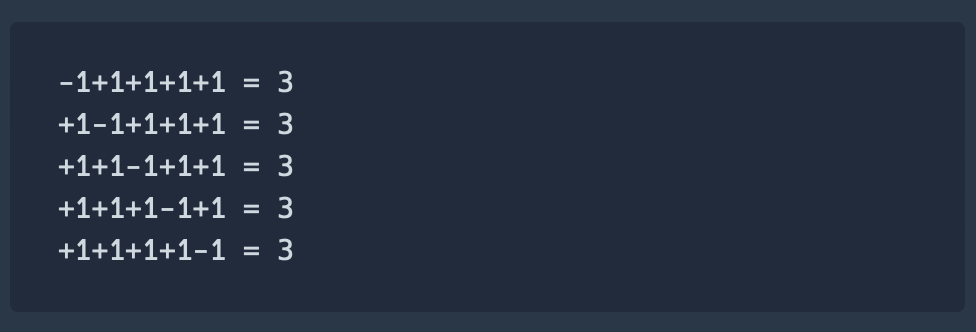

    사용할 수 있는 숫자가 담긴 배열 numbers, 타겟 넘버 target이 매개변수로 주어질 때 숫자를 적절히 더하고 빼서 타겟 넘버를 만드는 방법의 수를 return 하도록 solution 함수를 작성해주세요.

**제한사항**

    주어지는 숫자의 개수는 2개 이상 20개 이하입니다.
    각 숫자는 1 이상 50 이하인 자연수입니다.
    타겟 넘버는 1 이상 1000 이하인 자연수입니다.

**입출력 예**

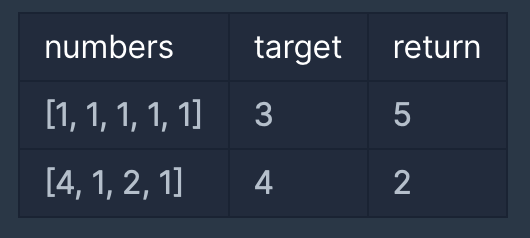

**입출력 예 설명**

    입출력 예 #1
    문제 예시와 같습니다.

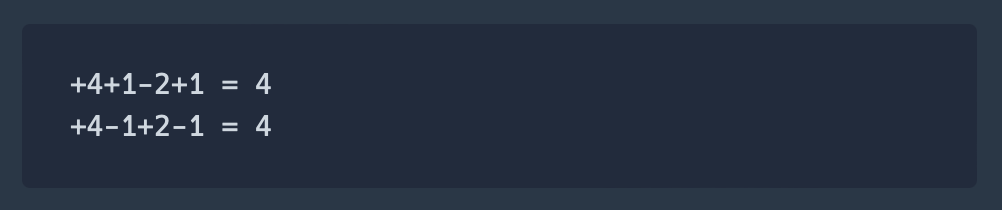

    입출력 예 #2
    +4+1-2+1 = 4
    +4-1+2-1 = 4
    총 2가지 방법이 있으므로, 2를 return 합니다.

**방법 1**

In [14]:
from itertools import product

def solution(numbers, target):
    numList = [(num, -num) for num in numbers]
    sumList = list(map(sum, product(*numList)))
    
    return sumList.count(target)

In [15]:
print(solution([1,1,1,1,1],3))
print(solution([4,1,2,1],4))

5
2


In [13]:
from itertools import product

numbers, target = [4, 1, 2, 1], 4

numList = [(num, -num) for num in numbers]
print(numList)
print(list(product(*numList)))
sumList = list(map(sum, product(*numList)))
print(sumList)

answer = sumList.count(target)
answer

[(4, -4), (1, -1), (2, -2), (1, -1)]
[(4, 1, 2, 1), (4, 1, 2, -1), (4, 1, -2, 1), (4, 1, -2, -1), (4, -1, 2, 1), (4, -1, 2, -1), (4, -1, -2, 1), (4, -1, -2, -1), (-4, 1, 2, 1), (-4, 1, 2, -1), (-4, 1, -2, 1), (-4, 1, -2, -1), (-4, -1, 2, 1), (-4, -1, 2, -1), (-4, -1, -2, 1), (-4, -1, -2, -1)]
[8, 6, 4, 2, 6, 4, 2, 0, 0, -2, -4, -6, -2, -4, -6, -8]


2

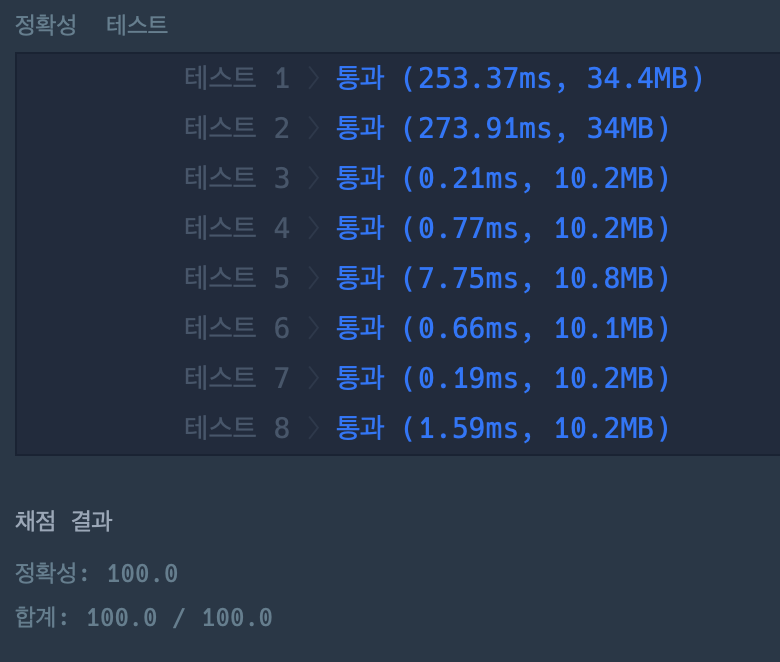

**방법 2**

In [21]:
def solution(numbers, target):
    if not numbers and target ==0:
        return 1
    elif not numbers:
        return 0

    else:
        return solution(numbers[1:], target-numbers[0]) + solution(numbers[1:], target+numbers[0])

In [22]:
print(solution([4,1,2,1],4 ))

2


**방법 3**

In [24]:
numbers, target = [4,1,2,1],4 

q = [0]

for num in numbers:
    s = []
    for _ in range(len(q)):
        x = q.pop()
        s.append(x+num)
        s.append(x+num*(-1))
    q = s.copy()
  
print(q)
q.count(target)

[-4, -6, 0, -2, -6, -8, -2, -4, 4, 2, 8, 6, 2, 0, 6, 4]


2

In [33]:
def solution(numbers, target):
    tmp = [0]
    for number in numbers:
        sumList = []
        for _ in range(len(tmp)):
            x = tmp.pop()
            sumList.append(x+number)
            sumList.append(x+number*(-1))
        tmp = sumList.copy()
    
    return tmp.count(target)

In [34]:
print(solution([1,1,1,1,1],3))
print(solution([4,1,2,1],4))

5
2


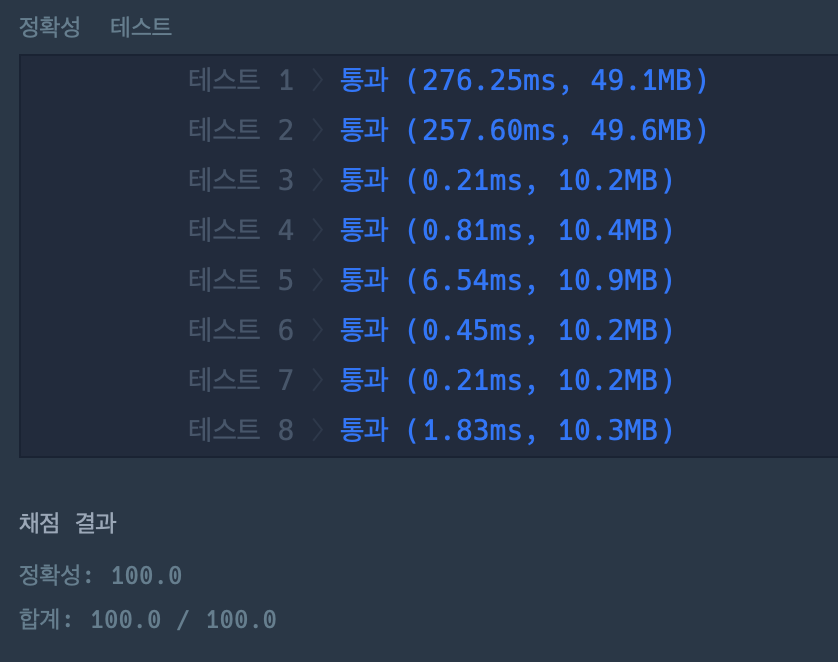

**방법 4**

In [46]:
from collections import deque

numbers, target = [4,1,2,1],4

answer = 0
queue = deque([[numbers[0],0], [-1*numbers[0],0]])
n = len(numbers)

while queue:
    num, idx = queue.popleft()
    idx+=1
    
    if idx <n:
        queue.append([num+numbers[idx], idx])
        queue.append([num-numbers[idx], idx])
    
    else:
        if num==target:
            answer+=1
            
answer

2

In [51]:
from collections import deque

def solution(numbers, target):
    answer = 0
    n = len(numbers)
    queue = deque([[numbers[0],0], [-1*numbers[0],0]])
    
    while queue:
        num, idx = queue.popleft()
        idx+=1
        
        if idx<n:
            queue.append([num+numbers[idx], idx])
            queue.append([num-numbers[idx], idx])
        
        else:
            if num==target:
                answer+=1
    return answer

In [52]:
print(solution([1,1,1,1,1],3))
print(solution([4,1,2,1],4))

5
2


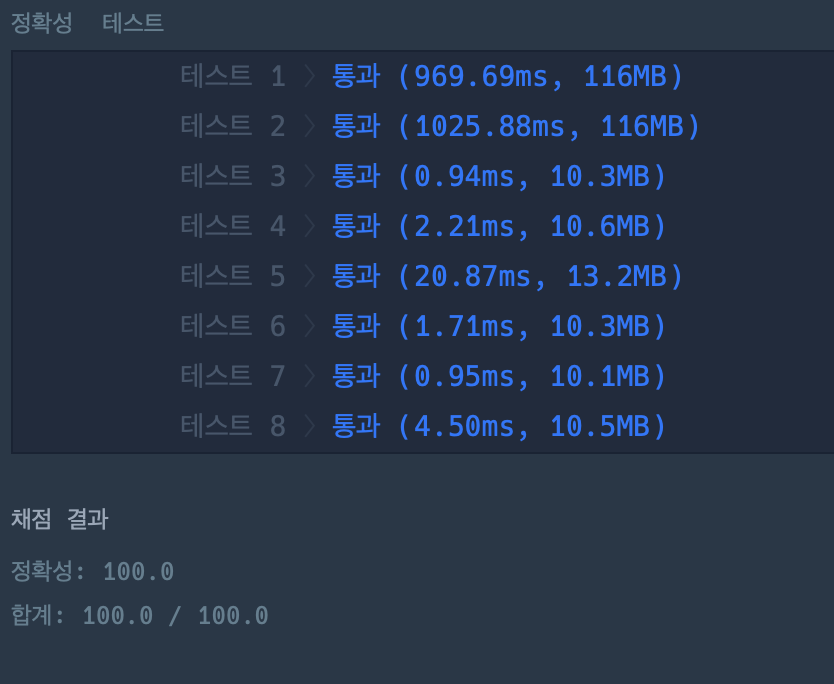